In [ ]:
"""
see how well the density and reconstruction loss are related for different token counts
"""

In [ ]:
import json
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
from torch.utils.data import DataLoader, Dataset
sys.path.append(os.path.abspath(".."))   # one level up from notebook/
from data.utils.dataloaders import ReconstructionDataset_Heuristic

/BS/data_mani_compress/work/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# read the density json file for each token count 
# folder: /BS/data_mani_compress/work/thesis/thesis/data/datasets/densities_new_imagenet/train_conditional_corrected
with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/train_conditional_corrected/token_count_256/token_count_256_all.json', 'r') as f:
    token_1 = json.load(f)

with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/train_conditional_corrected/token_count_2/token_count_2_all.json', 'r') as f:
    token_2 = json.load(f)

with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/train_conditional_corrected/token_count_4/token_count_4_all.json', 'r') as f:
    token_4 = json.load(f)

with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/train_conditional_corrected/token_count_8/token_count_8_all.json', 'r') as f:
    token_8 = json.load(f)

with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/train_conditional_corrected/token_count_32/token_count_32_all.json', 'r') as f:
    token_32 = json.load(f)

with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/train_conditional_corrected/token_count_64/token_count_64_all.json', 'r') as f:
    token_64 = json.load(f)

with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/train_conditional_corrected/token_count_128/token_count_128_all.json', 'r') as f:
    token_128 = json.load(f)

with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/train_conditional_corrected/token_count_256/token_count_256_all.json', 'r') as f:
    token_256 = json.load(f)

In [5]:
# read reconstruction loss json file 
with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/imagenet_reconstruction_losses/train/all_reconstruction_losses.json', 'r') as f:
    reconst_losses = json.load(f)

In [6]:
# this dataset holds the image_id, k_value, reconstruction_losses and optionally LID, density, edge ratio
dataset_1 = ReconstructionDataset_Heuristic(
    reconstruction_data=reconst_losses,
    local_density_information=token_256,
    error_key=['LPIPS', 'L1Loss']
)

In [8]:
print(dataset[0])

NameError: name 'dataset' is not defined

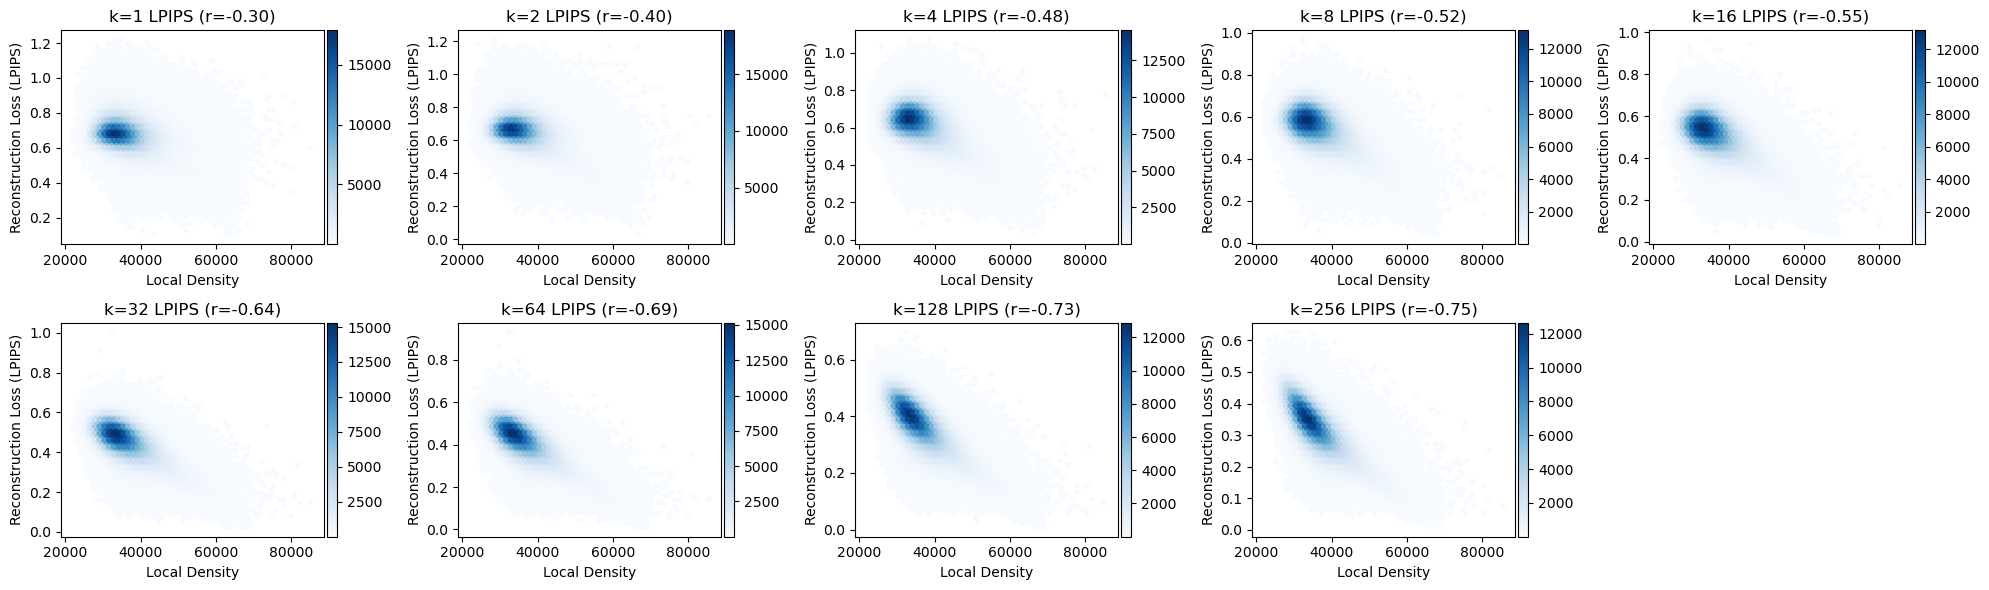

In [11]:


k_values = [1, 2, 4, 8, 16, 32, 64, 128, 256]
ncols   = 5
nrows   = int(math.ceil(len(k_values) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3), squeeze=False)
axes_flat = axes.flatten()

corr = []

for idx, k in enumerate(k_values):
    ax = axes_flat[idx]
    densities    = []
    losses_lpips = []
    for data_point in dataset_1:
        if data_point['k_value'] == k:
            densities.append(data_point['local_density'])
            losses_lpips.append(data_point['LPIPS'])

    # First hexbin: LPIPS vs density
    hb1 = ax.hexbin(densities, losses_lpips, gridsize=50, cmap='Blues', mincnt=1)
    if len(densities) > 1:
        corr1 = np.corrcoef(densities, losses_lpips)[0, 1]
    else:
        corr1 = float('nan')
    ax.set_title(f"k={k} LPIPS (r={corr1:.2f})")
    ax.set_xlabel('Local Density')
    ax.set_ylabel('Reconstruction Loss (LPIPS)')

    corr.append(corr1)

    # Optionally add a colorbar for the first hexbin
    fig.colorbar(hb1, ax=ax, orientation='vertical', pad=0.01, fraction=0.05)

# Hide unused subplots (if grid larger than number of k_values)
for j in range(len(k_values), nrows * ncols):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

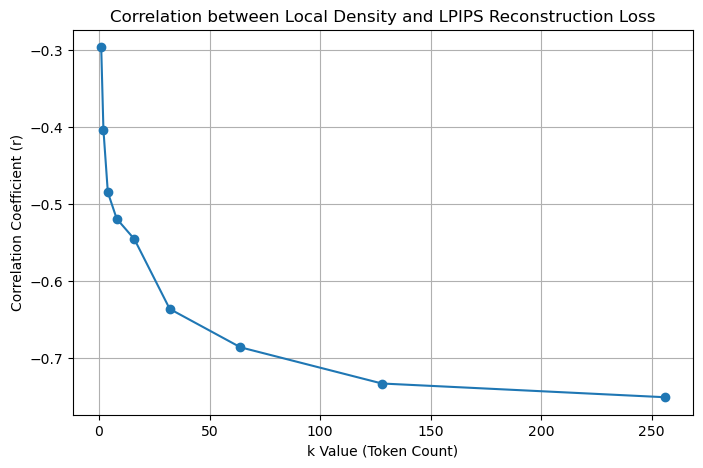

In [12]:
# plot correlation vs k_values
plt.figure(figsize=(8, 5))
plt.plot(k_values, corr, marker='o')
#plt.xscale('log', base=2)
plt.xlabel('k Value (Token Count)')
plt.ylabel('Correlation Coefficient (r)')
plt.title('Correlation between Local Density and LPIPS Reconstruction Loss')
plt.grid(True)
plt.show()